# CNN Architecture Assignment - CIFAR-10
**Student Assignment**: Neural Networks Course

This notebook explores convolutional neural networks using the CIFAR-10 dataset.

**Dataset**: CIFAR-10 (Canadian Institute For Advanced Research)
- 60,000 32x32 color images in 10 classes
- 50,000 training images and 10,000 test images
- Classes: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

## Task 1: Dataset Exploration (EDA)
Loading and analyzing the CIFAR-10 dataset to understand its structure and characteristics.

In [11]:
# Import required libraries
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Class names for CIFAR-10
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


### 1.1 Dataset Size and Dimensions
**Analysis:**
- Total samples: 60,000 (50,000 train + 10,000 test)
- Image dimensions: 32x32 pixels with 3 color channels (RGB)
- This is significantly more complex than MNIST (28x28 grayscale)

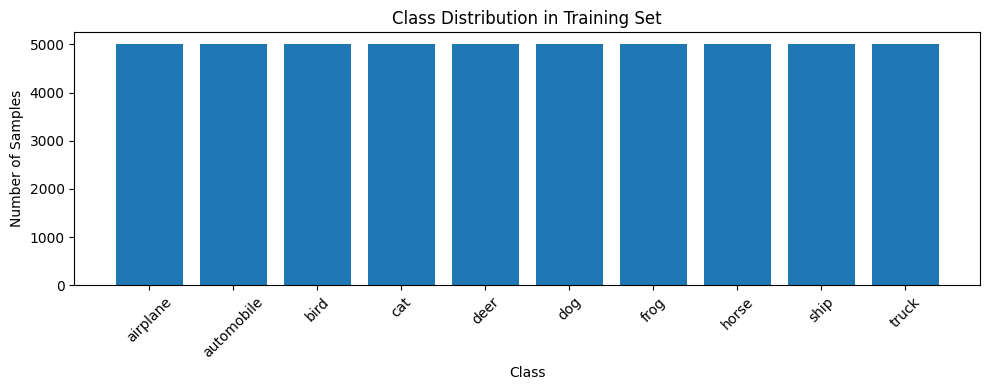


Class distribution:
airplane: 5000 samples
automobile: 5000 samples
bird: 5000 samples
cat: 5000 samples
deer: 5000 samples
dog: 5000 samples
frog: 5000 samples
horse: 5000 samples
ship: 5000 samples
truck: 5000 samples


In [12]:
# Check class distribution
unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(10, 4))
plt.bar([class_names[i] for i in unique], counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Training Set')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nClass distribution:")
for i, count in zip(unique, counts):
    print(f"{class_names[i]}: {count} samples")

### 1.2 Class Distribution
**Analysis:**
- The dataset is perfectly balanced with 5,000 samples per class
- No class imbalance issues to address
- This simplifies training and evaluation

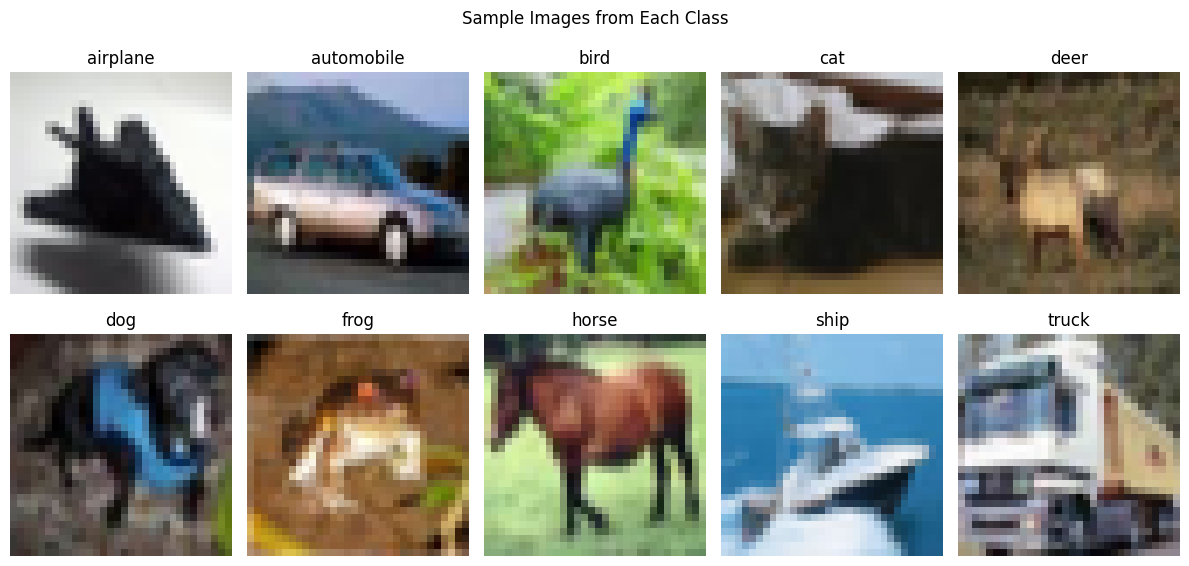

In [13]:
# Visualize sample images from each class
plt.figure(figsize=(12, 6))
for i in range(10):
    # Find first instance of each class
    idx = np.where(y_train == i)[0][0]
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[idx])
    plt.title(class_names[i])
    plt.axis('off')
plt.suptitle('Sample Images from Each Class')
plt.tight_layout()
plt.show()

### 1.3 Visual Inspection
**Analysis:**
- Images show significant variability in pose, lighting, and background
- Low resolution (32x32) makes some images challenging even for humans
- Color information is important for distinguishing classes

Pixel value range: [0, 255]
Mean pixel value: 120.71
Std pixel value: 64.15


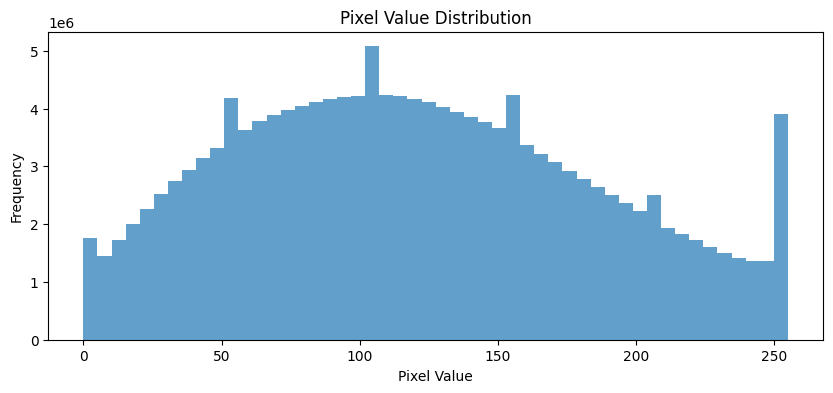

In [14]:
# Analyze pixel value distribution
print(f"Pixel value range: [{x_train.min()}, {x_train.max()}]")
print(f"Mean pixel value: {x_train.mean():.2f}")
print(f"Std pixel value: {x_train.std():.2f}")

# Plot pixel distribution
plt.figure(figsize=(10, 4))
plt.hist(x_train.flatten(), bins=50, alpha=0.7)
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Pixel Value Distribution')
plt.show()

### 1.4 Preprocessing Requirements
**Analysis:**
- Pixel values range from 0 to 255 (standard RGB format)
- **Normalization needed**: Divide by 255 to scale to [0, 1] range
- This helps neural networks train faster and more stably
- No resizing needed as all images are already 32x32

In [15]:
# Apply normalization
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

print(f"Normalized range: [{x_train_normalized.min()}, {x_train_normalized.max()}]")
print(f"Shape preserved: {x_train_normalized.shape}")

Normalized range: [0.0, 1.0]
Shape preserved: (50000, 32, 32, 3)


### 1.5 Why CIFAR-10 is Appropriate for Convolutional Layers

**Justification:**

1. **Spatial Structure**: Images have strong spatial relationships between neighboring pixels. Convolutions can exploit local patterns like edges, textures, and shapes.

2. **Translation Invariance**: Objects can appear at different positions in the image. Convolutional layers with weight sharing provide translation invariance.

3. **Hierarchical Features**: 
   - Early layers can detect edges and simple patterns
   - Middle layers can detect parts (wings, wheels)
   - Deeper layers can recognize complete objects

4. **Parameter Efficiency**: A fully connected layer for 32×32×3 images would have massive parameter count. Convolutions reduce this dramatically while maintaining expressive power.

5. **Color Channels**: RGB channels provide additional information that convolutions can process efficiently across all channels simultaneously.

---
## Task 2: Baseline Model (Non-Convolutional)
*To be implemented: Flatten + Dense layers*

## Task 3: Convolutional Architecture Design
*To be implemented: Custom CNN architecture*

## Task 4: Controlled Experiments
*To be implemented: Systematic exploration of one architectural aspect*

## Task 5: Interpretation and Reasoning
*To be completed: Analysis of results and architectural decisions*